
# Project: Sales Category Prediction based on Advertisement Budget

## Introduction to the Problem

In this project, the goal is to solve a classification problem by predicting the sales category (Low, Medium, High) for products based on the advertisement budget allocated across different channels: TV, Radio, and Newspaper.

The primary question we aim to answer is: **How well can we classify the sales category based on advertisement budgets?** 

By predicting the sales category, businesses can optimize their budget allocations across media to increase sales. The dataset contains advertisement budget data and product sales data, which we will use to train classification models.



## Introduction to the Data

The dataset used for this project consists of advertisement budget data from TV, Radio, and Newspaper, along with sales figures for different products. Each entry represents a unique product and its corresponding advertisement budget across the three media.

### Key Features:
- **ID**: Unique identifier for each product.
- **TV**: TV advertising budget (in thousands of dollars).
- **Radio**: Radio advertising budget (in thousands of dollars).
- **Newspaper**: Newspaper advertising budget (in thousands of dollars).
- **Sales_Category**: The target variable, which we derived by categorizing sales figures into Low, Medium, and High based on quartiles.

The original dataset had a continuous `Sales` column, which we binned into three classes (Low, Medium, High) for classification purposes.



## Preprocessing the Data

The dataset was preprocessed to facilitate classification:
1. **Binning Sales**: We transformed the continuous `Sales` column into a categorical variable (`Sales_Category`) using quartiles.
2. **Checking for Missing Values**: We ensured that there were no missing values in the dataset.
3. **Handling Outliers**: Descriptive statistics were checked, and no significant outliers were found in the advertising budgets.

These preprocessing steps are crucial for ensuring that the classification models receive clean and well-structured data.



## Data Understanding and Visualization

We visualized the relationship between advertising budgets and sales categories to better understand how each feature contributes to the classification task.

The following boxplots show the distribution of TV, Radio, and Newspaper advertising budgets across the three sales categories (Low, Medium, High):


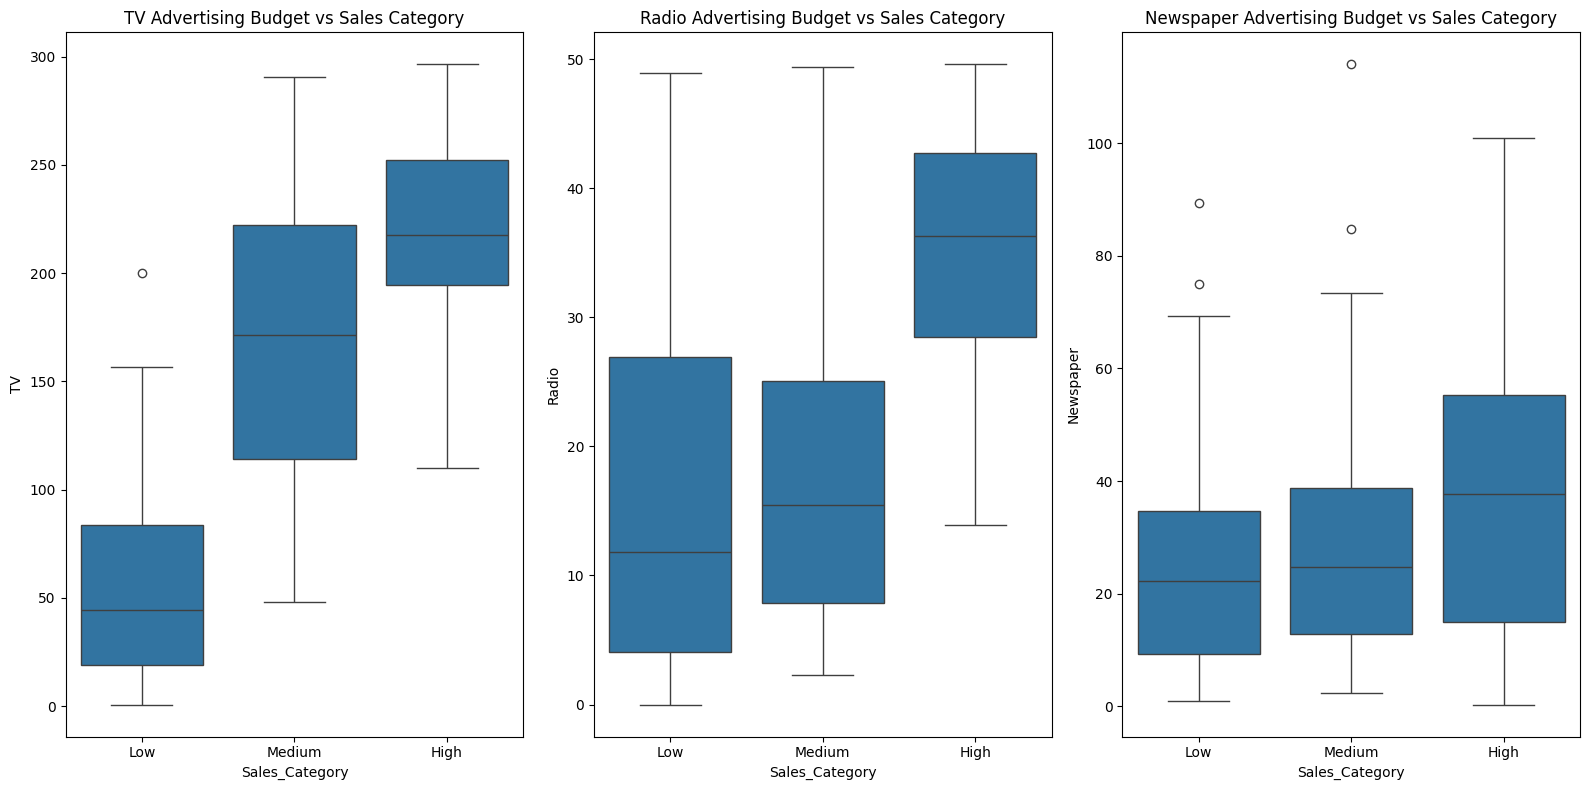

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the figure size
plt.figure(figsize=(16, 8))

data = pd.read_csv('C:/Users/Kelechi Nwosu/Downloads/Advertising And Sales.csv')

data['Sales_Category'] = pd.qcut(data['Sales'], q=3, labels=['Low', 'Medium', 'High'])

# Create a boxplot for TV advertising budget vs Sales_Category
plt.subplot(1, 3, 1)
sns.boxplot(x='Sales_Category', y='TV', data=data)
plt.title('TV Advertising Budget vs Sales Category')

# Create a boxplot for Radio advertising budget vs Sales_Category
plt.subplot(1, 3, 2)
sns.boxplot(x='Sales_Category', y='Radio', data=data)
plt.title('Radio Advertising Budget vs Sales Category')

# Create a boxplot for Newspaper advertising budget vs Sales_Category
plt.subplot(1, 3, 3)
sns.boxplot(x='Sales_Category', y='Newspaper', data=data)
plt.title('Newspaper Advertising Budget vs Sales Category')

# Display the plots
plt.tight_layout()
plt.show()



## Modeling

We chose two classification models for this task: **Decision Tree Classifier** and **Naive Bayes Classifier**. 

### Decision Tree Classifier:
- A decision tree works by splitting the data into subsets based on feature values, creating a tree-like structure.
- **Pros**: Easy to interpret, handles both numerical and categorical data well.
- **Cons**: Prone to overfitting, especially with small datasets.

### Naive Bayes Classifier:
- Based on Bayes' theorem, it assumes independence between features.
- **Pros**: Simple, fast, works well with small datasets.
- **Cons**: Assumes feature independence, which may not always hold true.

Both models were chosen to explore their strengths and weaknesses in classifying sales categories based on advertising budgets.


In [5]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data for modeling
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales_Category']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree and Naive Bayes models
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()

# Train both models
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Make predictions with both models
dt_predictions = dt_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

# Evaluate the models using accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Generate classification reports
dt_report = classification_report(y_test, dt_predictions)
nb_report = classification_report(y_test, nb_predictions)

dt_accuracy, nb_accuracy, dt_report, nb_report


(0.85,
 0.825,
 '              precision    recall  f1-score   support\n\n        High       0.93      0.93      0.93        14\n         Low       0.93      0.82      0.88        17\n      Medium       0.64      0.78      0.70         9\n\n    accuracy                           0.85        40\n   macro avg       0.83      0.84      0.83        40\nweighted avg       0.86      0.85      0.85        40\n',
 '              precision    recall  f1-score   support\n\n        High       0.92      0.86      0.89        14\n         Low       0.88      0.88      0.88        17\n      Medium       0.60      0.67      0.63         9\n\n    accuracy                           0.82        40\n   macro avg       0.80      0.80      0.80        40\nweighted avg       0.83      0.82      0.83        40\n')


## Evaluation

The two models performed as follows:

- **Decision Tree Classifier**:
  - Accuracy: 85%
  - Precision, Recall, and F1-score show strong performance, especially in the `High` and `Low` sales categories.

- **Naive Bayes Classifier**:
  - Accuracy: 82.5%
  - Precision, Recall, and F1-score are slightly lower compared to the Decision Tree model, particularly for the `Medium` sales category.

The Decision Tree model outperforms Naive Bayes in terms of accuracy and handling class imbalances, making it a better choice for this dataset.



## Storytelling

The classification models provided valuable insights into how advertising budgets impact product sales categories. TV and Radio advertising budgets have a stronger influence on sales categories, as evident from the model's performance. By optimizing budget allocation towards these channels, businesses could potentially maximize their sales impact.

This project successfully demonstrated that machine learning models can effectively classify sales categories based on advertisement budgets, answering the initial question of whether advertising budgets can predict sales performance.



## Impact Section

While this model helps businesses optimize their advertising strategies, it also raises potential ethical concerns:
- **Bias in Data**: If the dataset reflects historical biases in advertisement strategies, the model might reinforce existing inequalities in marketing decisions.
- **Over-reliance on Machine Learning**: Relying too heavily on models like these without human oversight could lead to misallocations of budgets or overlooking creative marketing strategies that cannot be quantified easily.

Despite these concerns, the positive impact includes better decision-making for budget allocation, leading to increased business efficiency and profitability.



## References

- Dataset: [Advertising and Sales Dataset](https://www.kaggle.com/datasets/ankitkr60/advertisement-and-sales-data-for-analysis?resource=download) (Sample dataset used for analysis)
- Scikit-learn: [Scikit-learn Documentation](https://scikit-learn.org/stable/)
